# Text Summarization using NLP

# What is text summmarization

Text Summarization is the process of condensing large piece of text to smaller text retaining the relevant information.

Why automatic Text Summarization
    * Summaries reduce reading time.
    
    * When researching documents,summaries make the selection process easier.
    
    * Automatic summarization improves the effectiveness of indexing.
    
    * Automatic summarization algorithms are less biased than human summarizers.
    
    * Personalised summaries are useful in question-answering systems as they provide
      personalised information.
      
    * Using automatic or semi-automatic summarization systems enables commercial abstract services to
      increase the number of text documents they ar able to process. 
    
    



Types of Text summarization


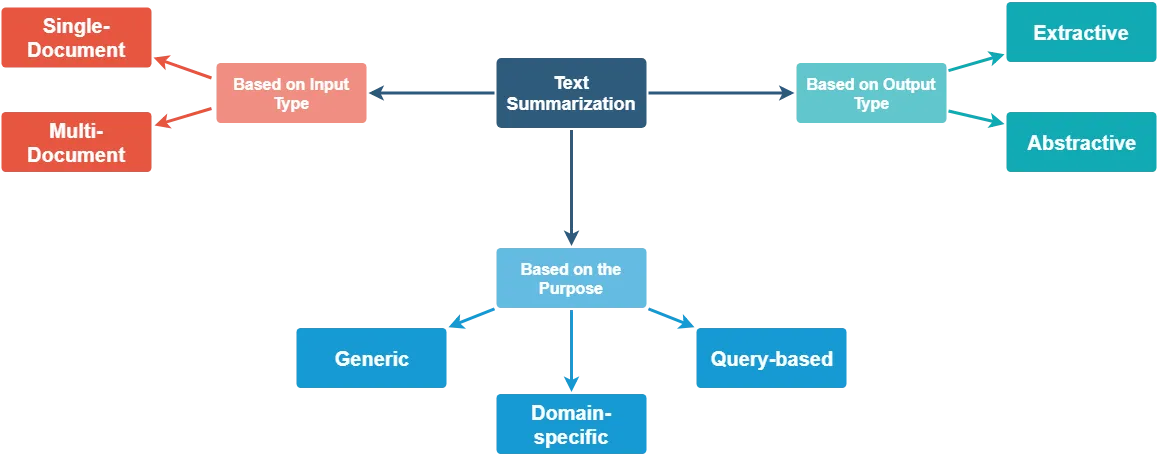

How to do Text Summarization

*Text Cleaning

*Sentence Tokenization

*Word Tokenization

*Word-Frequency Table

*Summarization


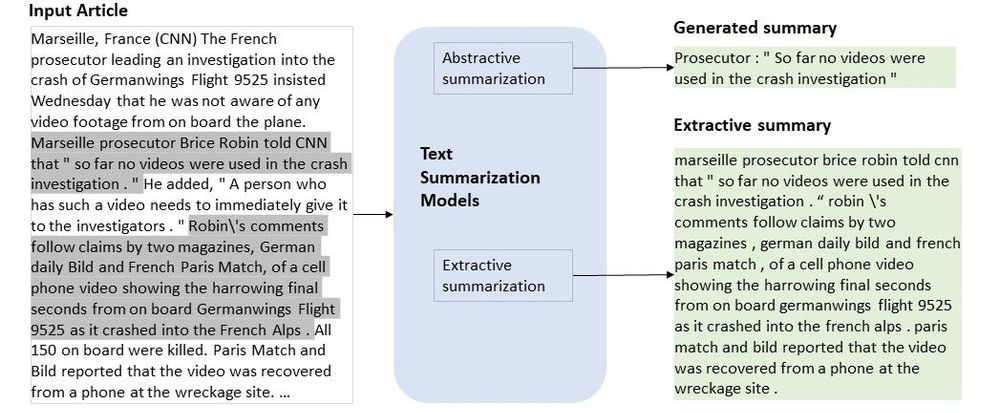

Reference: the sample generated summary is an output of a finetuned “unilm-base-cased" model, and the sample extractive summary is an output of a finetuned “distilbert-base-uncased”, and both are finetuned on CNN/Daily Mail dataset.

In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest
import bs4 as bs
import urllib.request
import re

In [6]:
scraped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')
article = scraped_data.read()

parsed_article = bs.BeautifulSoup(article,'lxml')

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

In [7]:
# Removing Square Brackets and Extra Spaces
article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)
article_text = re.sub(r'\s+', ' ', article_text)

In [8]:
# Removing special characters and digits
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize 
import heapq

In [10]:
sentence_list = nltk.sent_tokenize(article_text)

In [11]:
stopwords = nltk.corpus.stopwords.words('english')
word_frequencies = {}
for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

In [12]:
maximum_frequncy = max(word_frequencies.values())
for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

In [13]:
sentence_scores = {}
for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

In [14]:
summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)
summary = ' '.join(summary_sentences)
print(summary)

A machine with general intelligence can solve a wide variety of problems with breadth and versatility similar to human intelligence. Deep learning has drastically improved the performance of programs in many important subfields of artificial intelligence, including computer vision, speech recognition, image classification and others. A superintelligence, hyperintelligence, or superhuman intelligence, is a hypothetical agent that would possess intelligence far surpassing that of the brightest and most gifted human mind. AI founder John McCarthy agreed, writing that "Artificial intelligence is not, by definition, simulation of human intelligence".  Artificial intelligence (AI) is intelligence—perceiving, synthesizing, and inferring information—demonstrated by machines, as opposed to intelligence displayed by humans or by other animals. AI research has tried and discarded many different approaches, including simulating the brain, modeling human problem solving, formal logic, large databas

In [15]:
print(article_text)

 Artificial intelligence (AI) is intelligence—perceiving, synthesizing, and inferring information—demonstrated by machines, as opposed to intelligence displayed by humans or by other animals. Example tasks in which this is done include speech recognition, computer vision, translation between (natural) languages, as well as other mappings of inputs. AI applications include advanced web search engines (e.g., Google Search), recommendation systems (used by YouTube, Amazon, and Netflix), understanding human speech (such as Siri and Alexa), self-driving cars (e.g., Waymo), generative or creative tools (ChatGPT and AI art), automated decision-making, and competing at the highest level in strategic game systems (such as chess and Go). As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect. For instance, optical character recognition is frequently excluded from things considered to be 

In [16]:
len(article_text)

53685

In [17]:
len(summary)

1236